In [5]:
# 1. 필요한 라이브러리 임포트
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
import time
import os

# 2. User-Agent 설정
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36'
}

# 3. 빈 리스트 생성하여 데이터 저장 준비
stockList = []

# 4. 페이지별로 데이터 수집 (10페이지)
for i in range(1, 11):
    # URL 설정
    url = f"https://finance.naver.com/item/sise_day.nhn?code=005930&page={i}"
    
    # HTML 가져오기
    try:
        response = requests.get(url, headers=headers)
        response.encoding = 'euc-kr'
        if response.status_code != 200:
            print(f"페이지 {i} 크롤링 실패")
            continue
    except Exception as e:
        print(f"Error fetching URL: {e}")
        continue
    
    # BeautifulSoup으로 HTML 파싱
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # 주가 데이터가 있는 행 찾기
    tag_trs = soup.find_all('tr', attrs={"onmouseover": "mouseOver(this)"})
    
    # 각 행에서 데이터 추출
    for tr in tag_trs:
        tds = tr.find_all("td")
        if len(tds) != 7:  # 데이터 검증
            continue
        
        stock = {}
        
        # 날짜 추출
        date_text = tds[0].text.strip()
        if not date_text:
            continue
        stock['날짜'] = date_text
        
        # 종가 추출
        try:
            stock['종가'] = int(tds[1].text.replace(',', '').strip())
        except:
            continue
        
        # 전일비 추출
        if tds[2].find('img'):
            value = tds[2].text.strip().replace('\n', '').replace('\t', '')
            stock['전일비'] = f"-{value}" if tds[2].find('img')['alt'] == '하락' else value
        else:
            stock['전일비'] = tds[2].text.strip().replace('\n', '').replace('\t', '')
        
        # 시가, 고가, 저가, 거래량 추출
        try:
            stock['시가'] = int(tds[3].text.replace(',', '').strip())
            stock['고가'] = int(tds[4].text.replace(',', '').strip())
            stock['저가'] = int(tds[5].text.replace(',', '').strip())
            stock['거래량'] = int(tds[6].text.replace(',', '').strip())
        except:
            continue
        
        # 데이터 리스트에 추가
        stockList.append(stock)
    
    # 크롤링 간격 설정
    time.sleep(0.5)
    print(f"{i}페이지 크롤링 완료")

# 5. DataFrame 생성
df = pd.DataFrame(stockList)

# 6. 수집된 데이터 미리보기
print("\n수집된 데이터 미리보기:")
print(df.head())

# 7. 데이터 저장
# 저장할 디렉토리 생성
os.makedirs('./웹크롤링/data', exist_ok=True)

# CSV 파일로 저장
filename = f'./웹크롤링/data/삼성전자주가_{datetime.now().strftime("%Y%m%d")}.csv'
df.to_csv(filename, index=False, encoding='utf-8')
print(f"\n데이터가 성공적으로 저장되었습니다: {filename}")
print(f"총 {len(df)}개의 주가 데이터가 수집되었습니다.")


1페이지 크롤링 완료
2페이지 크롤링 완료
3페이지 크롤링 완료
4페이지 크롤링 완료
5페이지 크롤링 완료
6페이지 크롤링 완료
7페이지 크롤링 완료
8페이지 크롤링 완료
9페이지 크롤링 완료
10페이지 크롤링 완료

수집된 데이터 미리보기:
           날짜     종가      전일비     시가     고가     저가       거래량
0  2024.11.12  53000  하락2,000  54600  54600  53000  32862501
1  2024.11.11  55000  하락2,000  56700  56800  55000  29811326
2  2024.11.08  57000    하락500  58000  58300  57000  13877396
3  2024.11.07  57500    상승200  56900  58100  56800  17043102
4  2024.11.06  57300    하락300  57600  58000  56300  22092218

기본 통계 정보:
                 종가            시가            고가            저가           거래량
count    100.000000    100.000000    100.000000    100.000000  1.000000e+02
mean   71827.000000  71990.000000  72766.000000  71152.000000  2.271210e+07
std    10554.637594  10505.905025  10473.836764  10440.069275  9.628746e+06
min    53000.000000  54600.000000  54600.000000  53000.000000  7.805598e+06
25%    60950.000000  60425.000000  61625.000000  59900.000000  1.603389e+07
50%    74350.000000  74700.0000

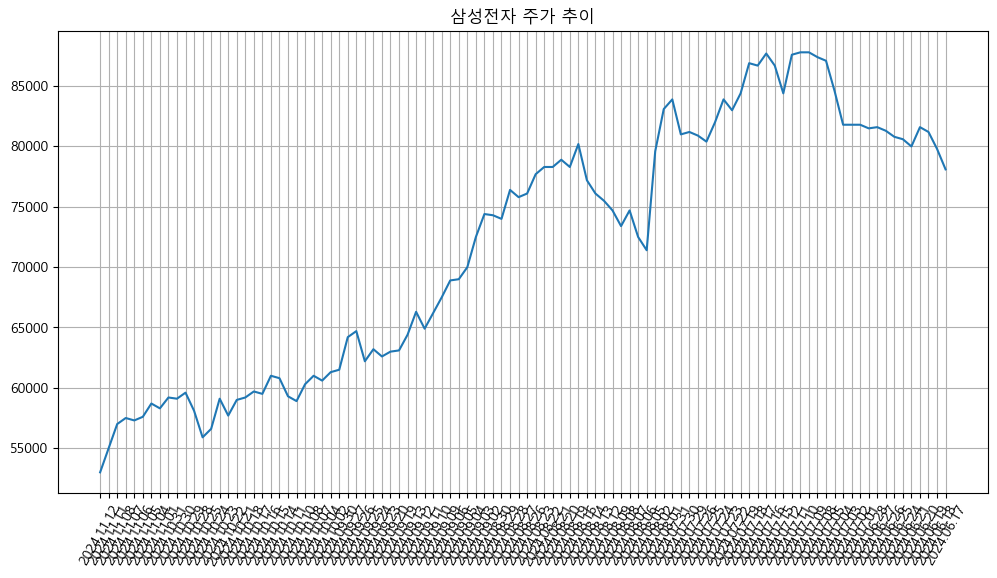

In [3]:
# 9. 간단한 데이터 시각화
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
# 2. 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
font_path = "c:/Windows/Fonts/malgun.ttf"   # 윈도우의 맑은 고딕
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.figure(figsize=(12, 6))
plt.plot(df['날짜'], df['종가'])
plt.title('삼성전자 주가 추이')
plt.xticks(rotation=60)
plt.grid(True)
plt.show()